## 2. Nichtlineare Gleichungssysteme mit Anwendungen

### 2.1 Beispiel von der anwendung von <code>nonlinsolve()</code>

In [157]:
from sympy import *
init_printing()
x,y=symbols("x y")

In [158]:
system=[x*y-1,4*x**2+y**2-5];
symbols=[x,y]

system

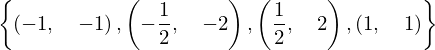

In [159]:
r=nonlinsolve(system,symbols)
r

Überprüfung:

In [160]:
(system[1].subs(x,list(r)[0][0]).subs(y,list(r)[0][1])==0)&(system[0].subs(x,list(r)[0][0]).subs(y,list(r)[0][1])==0)

True

### 2.2 Rohrleitungssysteme

<img src="2.png">

**Gegeben:**
$$ 
l_1=250m;
l_2=150m;
l_3=200m;\\
d=0.08m;\lambda=0.022;
$$
**Gesucht:**
$$Q_1,Q_2,Q_3$$

In [161]:
l1=250;l2=150;l3=200;
dm=0.08;l=0.022;

#### 2.2.1 Knotengleichungen
Ohne Konversion zum Sekunden:

$$\sum_{\textrm{i: hinein}}Q_i= \sum_{\textrm{i: aus}}Q_i \implies$$

I.$Q_1+Q_3=140 $

II.$Q_1=40+Q_2 $

III.$Q_2+Q_3=100 $

#### 2.2.2 Machengleichung mit fixiertes Lambda:
$\lambda=0.022;$

$a_1=\lambda\frac{l_1}{d^5}$
$a_2=\lambda\frac{l_2}{d^5}$
$a_3=\lambda\frac{l_3}{d^5}$

$$\sum \Delta p_i=0\implies \sum \pm a_iQ_i|Q_i|=0 \implies\\
a_1Q_1|Q_1|+a_2Q_2|Q_2|-a_3Q_3|Q_3|=0
$$



In [162]:
ss=[q1+q3-140/3600,
   q3+q2-100/3600,
   a1*(q1)*Abs(q1)+a2*q2*Abs(q2)-a3*q3*Abs(q3)]

In [163]:
a1=l*l1/dm**5;
a2=l*l2/dm**5;
a3=l*l3/dm**5;

In [164]:
ssymbols=[q1,q2,q3]

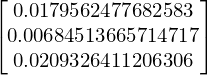

In [168]:
res=nsolve(ss,ssymbols,[1,1,1])
res

Überprüfen wir diese Werte:

In [169]:
check=[];
for eq in ss:
    eq=eq.subs(q1,res[0])
    eq=eq.subs(q2,res[1])
    eq=eq.subs(q3,res[2])
    check.append(eq)
check

#### 2.2.3 Maschengleichungen mit impliziertes Lambda

In [170]:
from sympy import *
q1,q2,q3,la1,la2,la3=symbols("q1 q2 q3 la1 la2 la3",real=True)

l1=250;l2=150;l3=200;
dm=0.08;
v=10**(-6);
k=0.00005;

a1=la1*l1/dm**5;
a2=la2*l2/dm**5;
a3=la3*l3/dm**5;

k1=q1+q3-140/3600;
k2=q3+q2-100/3600;
m=a1*(q1)*Abs(q1)+a2*q2*Abs(q2)-a3*q3*Abs(q3);

Re1=(4*Abs(q1))/(pi*dm*v);

ins1=(
    (2.51/
     (Re1*sqrt(la1))
    ) +
    k/(3.71*dm)
)
    
zg1 = (1/sqrt(la1))+2*log(ins1,10);

zg2=zg1.subs(la1,la2);
zg2=zg2.subs(q1,q2);

zg3=zg1.subs(la1,la3);
zg3=zg3.subs(q1,q3);

In [171]:
symbols=[q1,q2,q3,la1,la2,la3]
eqs=[k1,k2,m,zg1,zg2,zg3]
values=[0.01,0.001,0.01,0.022,0.022,0.022] # die wir haben oben geschätzt

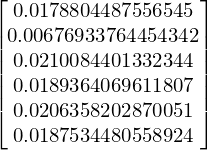

In [172]:
rn=nsolve(eqs,symbols,values)
rn

Überprüfung:

In [173]:
ch=[]
for eq in eqs:
    eq=eq.subs(q1,rn[0])
    eq=eq.subs(q2,rn[1])
    eq=eq.subs(q3,rn[2])
    eq=eq.subs(la1,rn[3])
    eq=eq.subs(la2,rn[4])
    eq=eq.subs(la3,rn[5])
    eq=eq.evalf()
    
    ch.append(eq)
ch
